In [290]:
import pydeck as pdk
import pandas as pd
import numpy as np

In [291]:
# read original data
data = pd.read_csv("./sample_taxi.csv")

In [292]:
# translate time into timestamp
# sort data by taxi_id and timestamp
# translate sorted data into od formation through several cpp files
taxi = data.copy()
taxi["time"] = [(int(i[0:2])*3600 + int(i[3:5])*60 + int(i[6:8])) for i in data["time"]]
taxi = taxi.sort_values(by=["taxi_id", "time"], ascending=True)
taxi.to_csv("./sorted_taxi.csv", index = False)

In [293]:
# load od data
odDistance = pd.read_csv("./odDistance.csv")

In [294]:
# get oigin and destination
od_o = odDistance.copy()
od_o.drop(['taxi_id', 'start_time', 'end_time', 'end_lon', 'end_lat', 'distance'], axis=1, inplace=True)
od_o.columns=['lon', 'lat']
od_d = odDistance.copy()
od_d.drop(['taxi_id', 'start_time', 'start_lon', 'start_lat', 'end_time', 'distance'], axis=1, inplace=True)
od_d.columns=['lon', 'lat']
od_o.to_csv("./origin.csv", index=False)
od_d.to_csv("./desitination.csv", index=False)

In [295]:
od_dl = odDistance.copy()
od_dl.drop(['taxi_id', 'start_time', 'start_lon', 'start_lat', 'end_time'], axis=1, inplace=True)
od_dl.columns=['lon', 'lat', 'd']
od_dl['distance'] = [float(i) for i in od_dl['d']]
od_dl.drop(['d'],axis=1,inplace=True)
# od_dl = od_dl[od_dl['distance']>0.1]
od_dl = od_dl[od_dl['distance']>0.5]

In [296]:
# get long distance order
od_l = odDistance.copy()
od_l.rename(columns={'distance': 'd'},inplace=True)
od_l['distance'] = [float(i) for i in od_l['d']]
od_l.drop(['d'],axis=1,inplace=True)
od_l = od_l[od_l['distance']>0.5]
# od_l.to_csv("./longDistance.csv",index=False)

In [297]:
from sklearn import metrics
from sklearn.cluster import KMeans

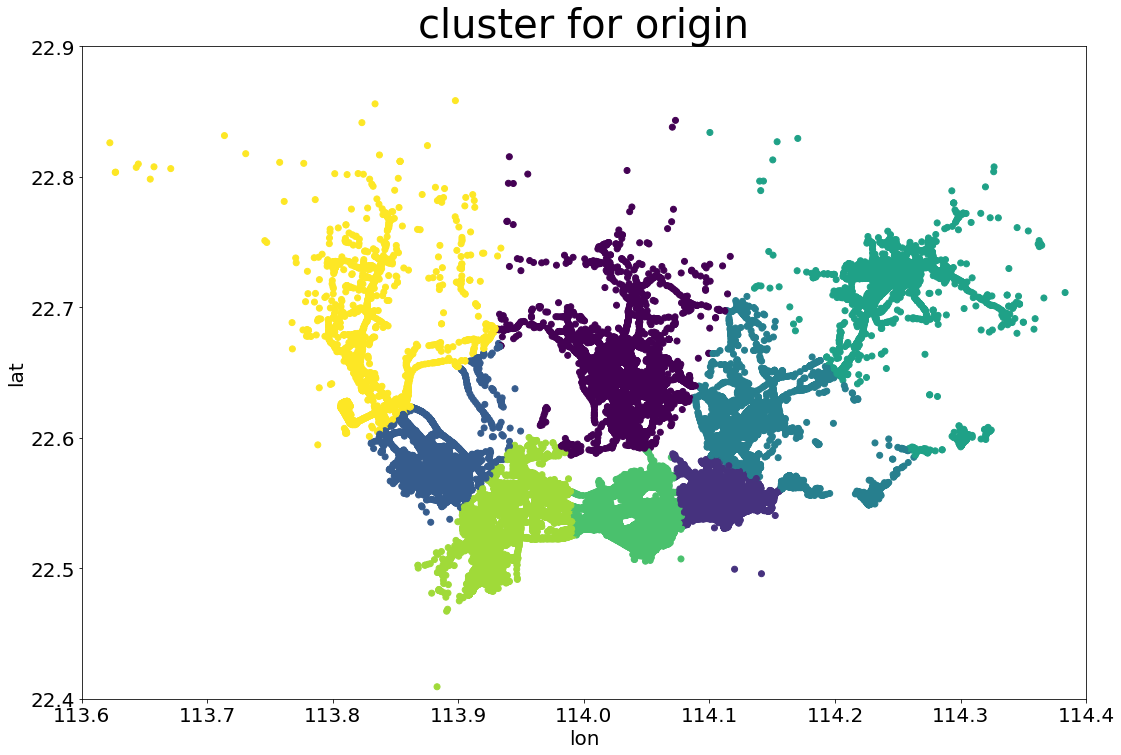

In [298]:
# K-means for ORIGIN
k_means = KMeans(n_clusters=8)
k_means.fit(od_o)
predict = k_means.fit_predict(od_o)
plt.figure(figsize=(18, 12))
plt.title('cluster for origin', fontsize=40)
plt.scatter(od_o['lon'], od_o['lat'], c=predict)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('lon', size=20)
plt.ylabel('lat', size=20)
plt.xlim(113.6,114.4)
plt.ylim(22.4,22.9)
plt.savefig("./clusterOrigin.png")
plt.show()

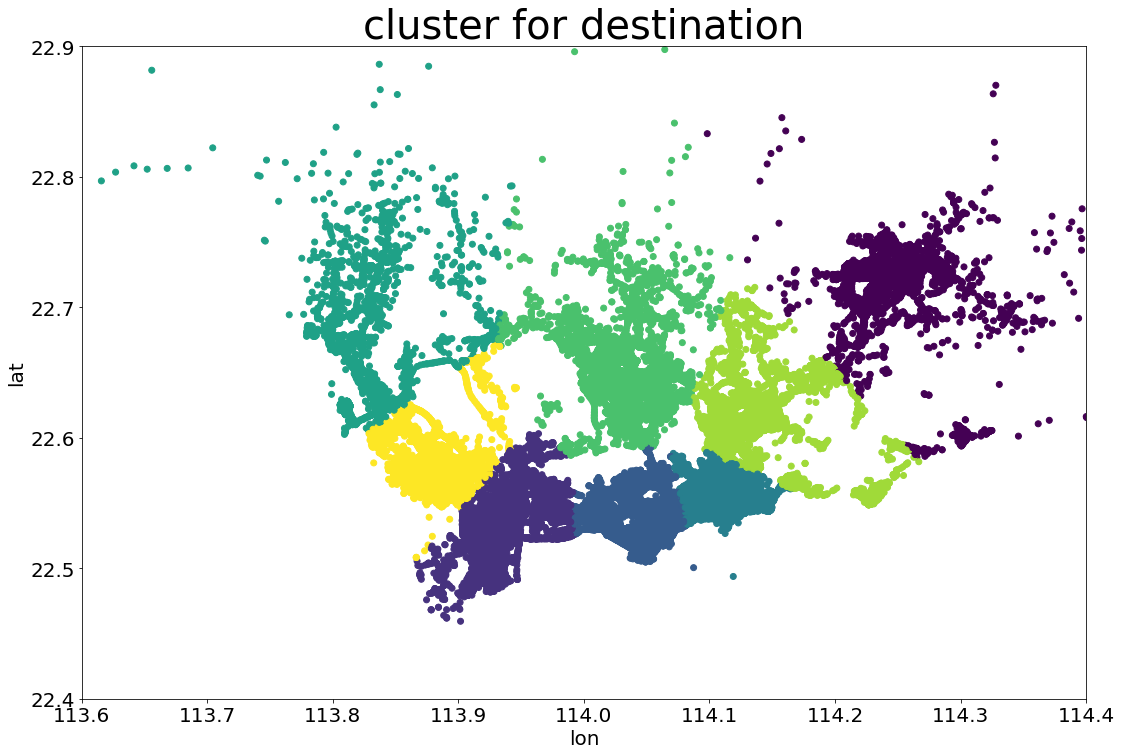

In [299]:
# K-means for DESTINATION
k_means = KMeans(n_clusters=8)
k_means.fit(od_d)
predict = k_means.fit_predict(od_d)
plt.figure(figsize=(18, 12))
plt.title('cluster for destination', fontsize = 40)
plt.scatter(od_d['lon'], od_d['lat'], c=predict)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('lon', size=20)
plt.ylabel('lat', size=20)
plt.xlim(113.6,114.4)
plt.ylim(22.4,22.9)
plt.savefig("./clusterDestination.png")
plt.show()

In [300]:
# draw a pic for origin 
UK_ACCIDENTS_DATA = 'https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/3d-heatmap/heatmap-data.csv'
layer1 = pdk.Layer(
    'ScatterplotLayer',
    od_o,
    get_position=['lon', 'lat'],
    auto_highlight=True,
    get_radius=50,
    get_fill_color='[180, 0, 200, 140]',
    pickable=True)
view_state = pdk.ViewState(
    longitude=113.9880000,
    latitude=22.5300000,
    zoom=11,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=0)
r1 = pdk.Deck(layers=[layer1], initial_view_state=view_state)
# r1.to_html("od_o.html")

In [301]:
import matplotlib.pyplot as plt
distance_backup = pd.read_csv("./odDistanceCost_valid.csv")

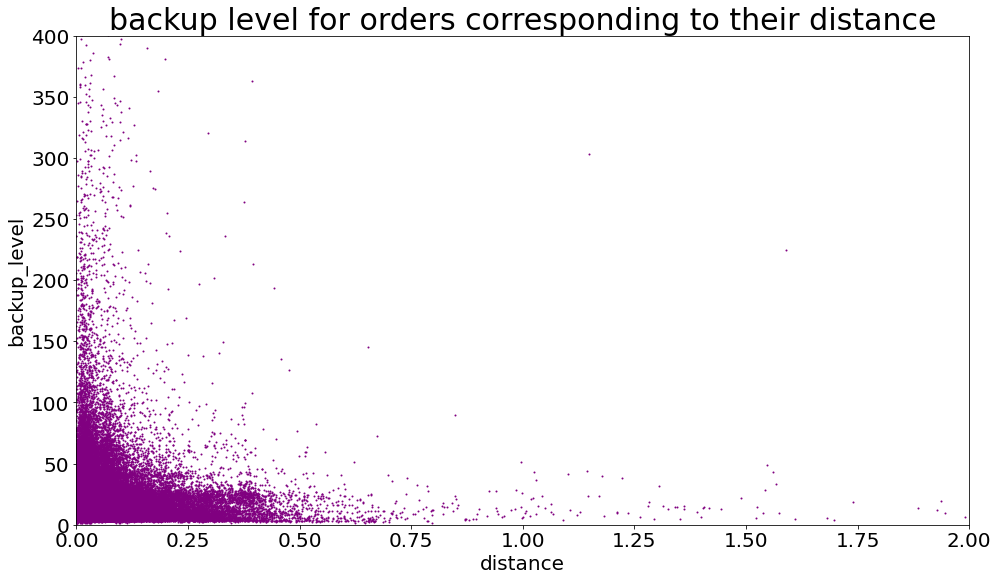

In [302]:
trainDC = distance_backup.copy()
trainDC.drop(['taxi_id','start_time','start_lon','start_lat','end_time','end_lon','end_lat'], axis=1,inplace=True)
X_train = trainDC.iloc[:,0].values.reshape(-1,1)
Y_train = trainDC.iloc[:,1].values.reshape(-1,1)
plt.figure(figsize=(16,9))
plt.xlabel('distance', size=20)
plt.ylabel('backup_level', size=20)
plt.title('backup level for orders corresponding to their distance', fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(0,2)
plt.ylim(0,400)
plt.scatter(X_train, Y_train, color='purple' ,s=1)
plt.savefig("./distance_backup2.png")
plt.show()

In [303]:
import numpy as np

In [304]:
# load timecount
timecount = pd.read_csv("./timeCount_valid.csv")
timecount

,time,speed_avg,true_speed,passengers
0,1,0.187109,36.742881,1486
1,2,0.187385,36.698695,1457
2,3,0.185415,37.003989,1334
3,4,0.177000,37.082635,1310
4,5,0.167130,36.802269,1239
...,...,...,...,...
139,140,0.210166,36.847621,1806
140,141,0.223086,38.452361,1789
141,142,0.222451,38.911304,1816
142,143,0.218979,39.215037,1778


            10             9             8             7             6
-1.221e-16 x  + 9.461e-14 x - 3.126e-11 x + 5.733e-09 x - 6.364e-07 x
              5            4          3          2
 + 4.371e-05 x - 0.001824 x + 0.0436 x - 0.5346 x + 2.74 x + 33.13


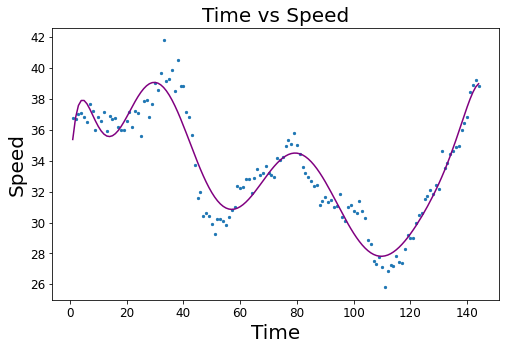

In [305]:
X_train = timecount.iloc[:,0].values.reshape(1,-1)[0,:]
Y_train = timecount.iloc[:,2].values.reshape(1,-1)[0,:]
z = np.polyfit(X_train, Y_train, 10)
p = np.poly1d(z)
print(p)
Y_pre = p(X_train)
plt.figure(figsize=(8,5))
plt.xlabel('Time', size=20)
plt.ylabel('Speed', size=20)
plt.title('Time vs Speed', fontsize=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.scatter(X_train, Y_train, s=5)
plt.plot(X_train, Y_pre,color='purple')
plt.savefig('./timeSpeed.png')
plt.show()

            15             14             13             12
-5.349e-23 x  + 6.177e-20 x  - 3.215e-17 x  + 9.956e-15 x 
             11             10             9             8            7
 - 2.04e-12 x  + 2.909e-10 x  - 2.957e-08 x + 2.161e-06 x - 0.000113 x
             6          5         4         3         2
 + 0.004161 x - 0.1052 x + 1.754 x - 18.18 x + 107.3 x - 356.2 x + 1797


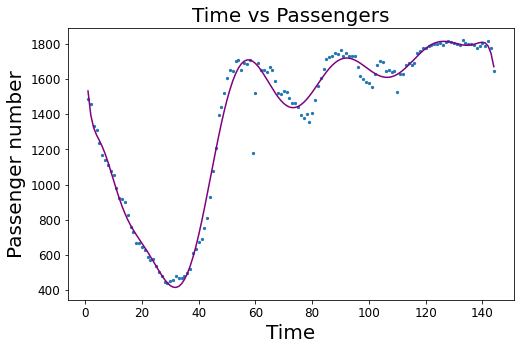

In [306]:
X_train1 = timecount.iloc[:,0].values.reshape(1,-1)[0,:]
Y_train1 = timecount.iloc[:,3].values.reshape(1,-1)[0,:]
z1 = np.polyfit(X_train1, Y_train1, 15)
p1 = np.poly1d(z1)
print(p1)
Y_pre1 = p1(X_train1)
plt.figure(figsize=(8,5))
plt.xlabel('Time', size=20)
plt.ylabel('Passenger number', size=20)
plt.title('Time vs Passengers', fontsize=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.scatter(X_train1, Y_train1,s=5)
plt.plot(X_train1, Y_pre1, color='purple')
plt.savefig('./timePassenger.png')
plt.show()

 
-0.005363 x + 40.94


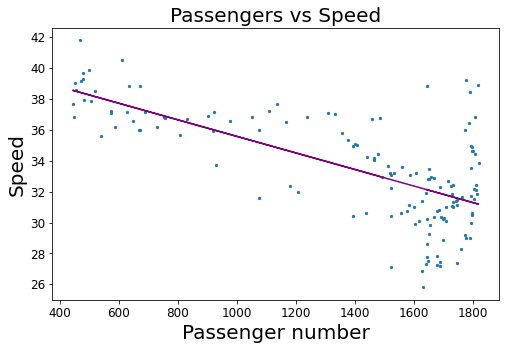

In [307]:
z2 = np.polyfit(Y_train1, Y_train, 1)
p2 = np.poly1d(z2)
print(p2)
Y_pre2 = p2(Y_train1)
plt.figure(figsize=(8,5))
plt.xlabel('Passenger number', size=20)
plt.ylabel('Speed', size=20)
plt.title('Passengers vs Speed', fontsize=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.scatter(Y_train1, Y_train,s=5)
plt.plot(Y_train1, Y_pre2, color='purple')
plt.savefig('./passengerSpeed.png')
plt.show()

            17             16             15             14
-5.382e-30 x  + 6.546e-27 x  - 3.633e-24 x  + 1.218e-21 x 
              13             12            11             10
 - 2.752e-19 x  + 4.423e-17 x  - 5.21e-15 x  + 4.561e-13 x 
              9             8             7             6             5
 - 2.977e-11 x + 1.441e-09 x - 5.101e-08 x + 1.287e-06 x - 2.224e-05 x
              4            3            2
 + 0.0002484 x - 0.001629 x + 0.005316 x - 0.01154 x + 0.1968


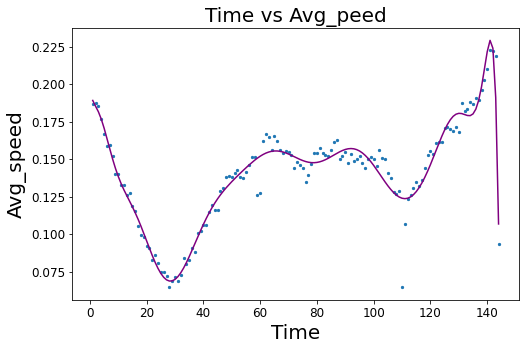

In [308]:
X_train3 = timecount.iloc[:,0].values.reshape(1,-1)[0,:]
Y_train3 = timecount.iloc[:,1].values.reshape(1,-1)[0,:]
z3 = np.polyfit(X_train3, Y_train3, 17)
p3 = np.poly1d(z3)
print(p3)
Y_pre3 = p3(X_train3)
plt.figure(figsize=(8,5))
plt.xlabel('Time', size=20)
plt.ylabel('Avg_speed', size=20)
plt.title('Time vs Avg_peed', fontsize=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.scatter(X_train3, Y_train3, s=5)
plt.plot(X_train3, Y_pre3,color='purple')
plt.savefig('./timeSpeedavg.png')
plt.show()

In [309]:
hour = data.copy()
hour["hour"] = [int(i[0:2]) for i in data["time"]]

In [310]:
tmp = hour[hour["hour"] < 10]
data_early = tmp[tmp["hour"] > 6]
tmp = hour[hour["hour"] < 20]
data_night = tmp[tmp["hour"] > 16]
# data_night